# Alchex Demonstration Notebook

## Requirements

- Python 2.7
- MDAnalysis 0.13
- Matplotlib
- Numpy
- Scipy
- NetworkX
- GROMACS

## Configuration

You will need to set an appropriate `GMX EXECUTABLE` for your system. This is whatever you normally use to call GROMACS and usually `gmx`. If you encounter any problems, check that GROMACS is available on your system and use the output of `which gmx` instead.

In [1]:
GMX_EXECUTABLE = "gmx"

In [2]:
# Check if GROMACS is available
from subprocess import check_output, CalledProcessError
try:
    check_output(GMX_EXECUTABLE)
    print("Ready to go")
except CalledProcessError:
    print("Please check your GROMACS executable settings.")

Ready to go


In [3]:
import alchex.config
import alchex.logger
import demo_extras

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib notebook

/Users/tom/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/tom/anaconda/envs/python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
demo_config = alchex.config.default_configuration()
demo_config.gromacs_executable = GMX_EXECUTABLE

In [5]:
demo_config.build_exchange_map(
    from_resname="POPE", 
    from_moltype="POPE", 
    to_resname = "CHOL",
    to_moltype = "CHOL", 
    exchange_model="martini.static_planar_alignment", 
    draw=False, 
    clusters=[
        [
            ["PO4", "NH3"],
            ["ROH"],
            1
        ],
        [
            ["C1B", "C2A"],
            ["R2", "R4"],
            1
        ],
        [
            ["C4B", "C4A"],
            ["C2"],
            1
        ]
    ])

demo_config.build_exchange_map(
    from_resname="POPE", 
    from_moltype="POPE", 
    to_resname = "POPG",
    to_moltype = "POPG", 
    exchange_model="martini.lipid",
    )
demo_config.build_exchange_map(
    from_resname="POPE", 
    from_moltype="POPE", 
    to_resname = "CDL0",
    to_moltype = "CDL0", 
    exchange_model="martini.lipid_to_card"
    )

In [6]:
dppc         = demo_config.get_reference_structure("DPPC")
dlpg         = demo_config.get_reference_structure("DLPG")
chol         = demo_config.get_reference_structure("CHOL")
cdl0         = demo_config.get_reference_structure("CDL0")
cddg         = demo_config.get_reference_structure("CDDG")

dppc_to_dlpg = demo_config.get_exchange_map("DPPC", "DLPG")
dppc_to_chol = demo_config.get_exchange_map("DPPC", "CHOL")
dppc_to_cdl0 = demo_config.get_exchange_map("DPPC", "CDL0")
dppc_to_cddg = demo_config.get_exchange_map("DPPC", "CDDG")

print(dppc_to_dlpg)
print(dppc_to_chol)
print(dppc_to_cdl0)
print(dppc_to_cddg)

 〘 ⚗ Change 1x DPPC to 1x DLPG ☑☑☐☐☑ 〙 
 〘 ⚗ Change 1x DPPC to 1x CHOL ☐☐☑☐☐ 〙 
 〘 ⚗ Change 2x DPPC to 1x CDL0 ☑☑☐☑☑ 〙 
 〘 ⚗ Change 1x DPPC to 1x CDDG ☑☑☐☐☑ 〙 


<IPython.core.display.Javascript object>


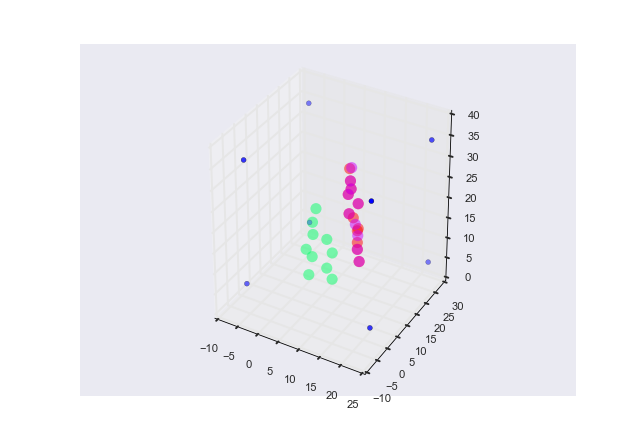

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


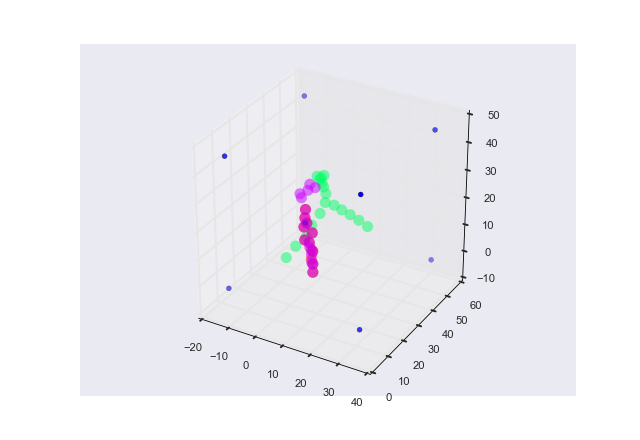

In [7]:
replaced = dppc_to_dlpg.run(dppc, dlpg, plot=True)
replaced = dppc_to_chol.run(dppc, chol, plot=True)
replaced = dppc_to_cddg.run(dppc, cddg, plot=True)

# Replace Molecules in a POPE Vesicle

This vesicle contains 877 POPE Molecules

In [8]:
from alchex.replacement import ReplacementSystem

In [18]:
vesicle = ReplacementSystem(
    alchex_config = demo_config,
    input_structure_filename="vesicle/pope_vesicle.gro",
    input_topology_filename="vesicle/pope_vesicle.top",
    root_folder="vesicle-test-run"
    )

vesicle.auto_replace({
    "selection": "leaflet inner",
    "composition" :{
        "DPPC" : 1,
        "DLPG" : 1,
        "CDL0" : 1
        }},
    {
    "selection": "leaflet outer",
    "composition" :{
        "POPS" : 3,
        "POPG" : 2,
        "CHOL" : 1
        }})

 ⚗ Replacing residues ┠██████████████████████████████████████████████████┨ 🌖  100.0%    



In [19]:
before, after = demo_extras.render_comparison()

## Original vesicle

In [20]:
display(before)

## Replaced, energy minimised vesicle

In [21]:
display(after)

In [40]:
vesicle = ReplacementSystem(
    alchex_config = demo_config,
    input_structure_filename="vesicle/pope_vesicle.gro",
    input_topology_filename="vesicle/pope_vesicle.top",
    root_folder="vesicle-test-run"
    )

vesicle.auto_replace({
    "selection": "resname POPE and leaflet inner and same resid as prop y < 100",
    "composition" :{
        "DPPC" : 1
        }},
    {
    "selection": "resname POPE and leaflet outer and same resid as prop y < 80",
    "composition" :{
        "POPS" : 1
        }},
    {
    "selection": "resname POPE and leaflet outer and same resid as prop y > 100",
    "composition" :{
        "DLPG" : 1
        }})

 ⚗ Replacing residues ┠██████████████████████████████████████████████████┨ 🌗  100.0%    



In [41]:
before, after = demo_extras.render_comparison()

In [42]:
display(before)

In [43]:
display(after)